In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

board_games = pd.read_csv("board_games.csv")
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


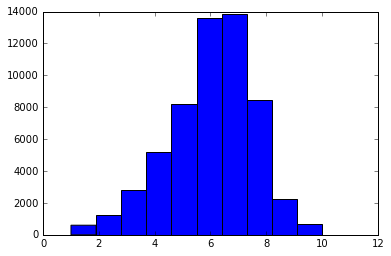

In [2]:
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games["users_rated"]>0]
plt.hist(board_games["average_rating"])
plt.show()


In [3]:
print(board_games["average_rating"].std())
print(board_games["average_rating"].mean())

1.57882993483
6.01611284933


## Error metric
In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

In [4]:
from sklearn.cluster import KMeans
numeric_columns = board_games.iloc[:, 3:]
numeric_columns.isnull().any()

yearpublished           False
minplayers              False
maxplayers              False
playingtime             False
minplaytime             False
maxplaytime             False
minage                  False
users_rated             False
average_rating          False
bayes_average_rating    False
total_owners            False
total_traders           False
total_wanters           False
total_wishers           False
total_comments          False
total_weights           False
average_weight          False
dtype: bool

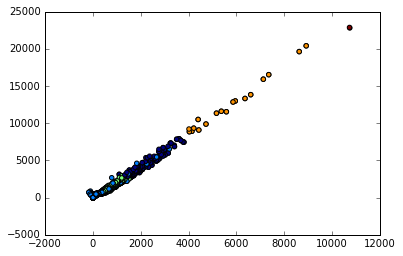

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(numeric_columns)
labels = kmeans.labels_
game_mean = numeric_columns.apply(np.mean, axis=1)
game_std = numeric_columns.apply(np.std, axis=1)
plt.scatter(game_mean, game_std, c=labels)
plt.show()

## Game clusters
It looks like most games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players

In [6]:
correlations = numeric_columns.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [10]:
df = board_games.drop("average_rating",1)
df = df.drop("bayes_average_rating",1)

In [8]:


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cols.remove("average_rating")
cols.remove("bayes_average_rating")
reg.fit(board_games[cols], board_games["average_rating"])
predictions = reg.predict(board_games[cols])

numpy.mean((predictions - board_games["average_rating"]) ** 2)

NameError: name 'numpy' is not defined